# Project 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from random import random, seed

In [4]:
from RegLib.RegressionMethod import RegressionMethod, RegressionType
from RegLib.SamplingMethod import SamplingMethod
from RegLib.HelperFunctions import *
#from RegLib.BootstrapSampling import BootstrapSampling
#from CrossValidationKFold import CrossValidationKFold

In [6]:
seed = 2018
np.random.seed(seed)
# Make data.
x0 = np.arange(0, 1, 0.05)
y0 = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x0,y0)

z = FrankeFunction(x, y)

In [5]:
# x0, y0, z0 = create_frankie_data(seed, N = N, noise_strength=0.0)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x0, y0, z0, c='skyblue', s=5)
# ax.scatter(x, y, z, c='red', s=5)
# #ax.view_init(30, 185)
# plt.show()

### Part a): Ordinary Least Square (OLS) on the Franke function
- [ ] Fix your x and y values, they should span the whole room. Using linspace and mesh
- [ ] Add confidence intervals for beta by computing variance for each beta

### a) OLS on the Franke function
Show confidence_interval

In [8]:
N = 10
noise = 0.0
x, y, z = create_frankie_data(seed, N = N, noise_strength=noise)
X = create_X(x, y, n = 1)
# sampling = SamplingMethod().train_and_test(X, z, RegressionType.OLS)
#confidence_interval(X, z, sampling.model.beta, noise, N, save_fig = True)

In [15]:
perm_index = np.random.permutation(len(z))
print(perm_index == [-1])
X = X[perm_index]
z[perm_index]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


array([0.23821222, 1.04936483, 0.07936368, 0.82498356, 0.12182968,
       0.13824057, 0.12693047, 0.85281025, 0.31904594, 0.49666906,
       0.10354291, 0.53346756, 0.20610809, 0.35637244, 0.3303275 ,
       0.64481475, 0.10040846, 0.09860884, 1.07782924, 0.13883173,
       1.06831515, 0.22435557, 0.07772461, 0.27440737, 0.61258306,
       0.3537022 , 0.05438376, 0.12507008, 0.26906819, 1.05502223,
       1.01989194, 0.60664422, 0.14407023, 0.06248884, 0.12746187,
       0.11304003, 0.62061394, 0.57206797, 0.15483075, 0.15174039,
       0.8483689 , 0.11379488, 0.25508157, 0.10038724, 0.25561024,
       0.05255256, 0.06596767, 0.31968264, 1.08452931, 0.05705096,
       0.12420318, 0.08674972, 0.17717411, 0.11624481, 0.23439169,
       0.14616345, 0.2565682 , 0.38942582, 0.26851163, 0.1597401 ,
       0.4941593 , 0.07127311, 0.5453849 , 0.16155584, 0.38516329,
       0.42776229, 0.38980742, 0.09360412, 0.42376588, 0.07330214,
       0.06944621, 0.27689426, 0.09156376, 0.18730015, 0.49265

### Part b): Bias-variance trade-off and resamplng techniques

- [ ] Implement bootstraping, it should get data several times for each polynomial. Just to have a better estimate of errors and such. Not to to train better

In [5]:
N = 500
noise = 0.1
p = 8
trials = 10000
sample_count = N
polydegree = np.zeros(p); r2_boot = np.zeros(p); mse_boot = np.zeros(p); bias_boot = np.zeros(p); var_boot = np.zeros(p)

r2_boot_train = np.zeros(p); mse_boot_train = np.zeros(p); bias_boot_train = np.zeros(p); var_boot_train = np.zeros(p)
x, y, z = create_frankie_data(seed, N,  noise_strength=noise)

for degree in range(p):
    polydegree[degree] = degree + 1

    X = create_X(x, y, degree, debug = False)
    boot = BootstrapSampling(trials, sample_count).train_and_test(X, z, RegressionType.OLS)

    r2_boot[degree] = boot.r2; mse_boot[degree] = boot.mse; bias_boot[degree] = boot.bias; var_boot[degree] = boot.var; 
    r2_boot_train[degree] = boot.r2_train; mse_boot_train[degree] = boot.mse_train; bias_boot_train[degree] = boot.bias_train; var_boot_train[degree] = boot.var_train; 

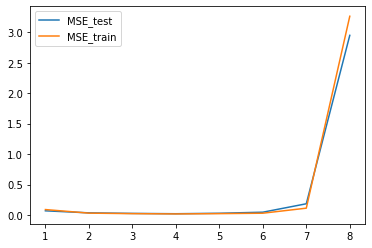

In [32]:
values_to_plot = {
    # "Var": var_boot,
    # "Bias": bias_boot,
    "MSE_test": mse_boot,
    "MSE_train": mse_boot_train,
}

plot_test_train(polydegree, values_to_plot)

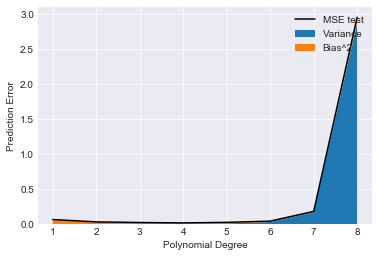

In [34]:


values_to_plot = {
    "variance": var_boot,
    "mse": mse_boot,
    "bias": bias_boot,
}

plot_bias_variance_analysis(polydegree, values_to_plot)

### c): Cross-validation

In [35]:
k_folds = 5
p = 12
N = 100
polydegree = np.zeros(p)

train_results_cross_valid = RegressionResults(p)
test_results_cross_valid = RegressionResults(p)
x, y, z = create_frankie_data(seed, N)
for degree in range(p):
    polydegree[degree] = degree

    X = create_X(x, y, degree, debug = False)
    cross_valid = CrossValidationKFold(X, z, RegressionMethod(), k_folds)
    train_deg_result, test_deg_result = cross_valid.fit()
    train_results_cross_valid.set_results(train_deg_result, degree)
    test_results_cross_valid.set_results(test_deg_result, degree)

NameError: name 'RegressionResults' is not defined

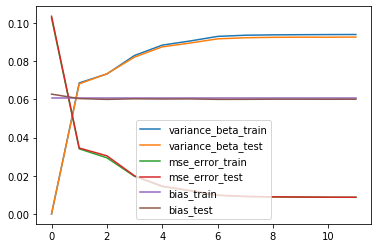

In [10]:
values_to_plot = {
    "variance_beta_train": train_results_cross_valid.variance_beta_avg,
    "variance_beta_test": test_results_cross_valid.variance_beta_avg,
    "mse_error_train": train_results_cross_valid.mse_avg,
    "mse_error_test": test_results_cross_valid.mse_avg,
    "bias_train": train_results_cross_valid.bias_avg,
    "bias_test": test_results_cross_valid.bias_avg,
}


plot_test_train(polydegree, values_to_plot)

### Part d): Ridge Regression on the Franke function  with resampling

1. Implement Ridge Regression
2. Preform bootstrap analysis as in b)
3. Preform cross-validation as in c) but now on dependence on $\lambda$
4. Comment on the differences

- [ ] Compute beta using s v d
- [ ] Implement your own svd ?

In [4]:
trials = 5
sample_count = 1000
p = 4
N = 1000
polydegree = np.zeros(p)

train_results = RegressionResults(p)
test_results = RegressionResults(p)
x, y, z = create_frankie_data(seed, N)
for degree in range(p):
    print("Bootstrap: ", degree + 1)
    polydegree[degree] = degree

    X = create_X(x, y, degree, debug = False)
    boot = BootstrapSampling(X, z, RegressionMethod(ModelType.Ridge), trials, sample_count)
    train_deg_result, test_deg_result = boot.fit()
    train_results.set_results(train_deg_result, degree)
    test_results.set_results(test_deg_result, degree)

Bootstrap:  1
Bootstrap:  2
Bootstrap:  3
Bootstrap:  4


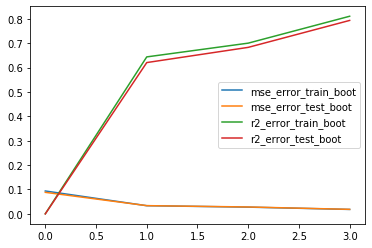

In [5]:
values_to_plot = {
    "mse_error_train_boot": train_results.mse_avg,
    "mse_error_test_boot": test_results.mse_avg,
    "r2_error_train_boot": train_results.r2_avg,
    "r2_error_test_boot": test_results.r2_avg,
}

plot_test_train(polydegree, values_to_plot)

0  lambda:  0.0
1  lambda:  0.1
2  lambda:  1.0
3  lambda:  100.0
4  lambda:  1000.0
5  lambda:  1000000.0


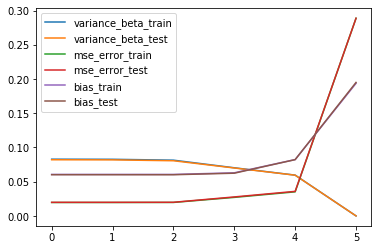

In [6]:
k_folds = 5
p = 3
N = 100
lambda_values = np.array([0.0, 0.1, 1.0, 100.0, 1000.0, 1000000.0])
train_results_cross_valid = RegressionResults(len(lambda_values))
test_results_cross_valid = RegressionResults(len(lambda_values))
x, y, z = create_frankie_data(seed, N)
X = create_X(x, y, p, debug = False)

for i in range(len(lambda_values)):
    print(i, " lambda: ", lambda_values[i])
    cross_valid = CrossValidationKFold(X, z, RegressionMethod(ModelType.Ridge, alpha = lambda_values[i]), k_folds)
    train_deg_result, test_deg_result = cross_valid.fit()
    train_results_cross_valid.set_results(train_deg_result, i)
    test_results_cross_valid.set_results(test_deg_result, i)

values_to_plot = {
    "variance_beta_train": train_results_cross_valid.variance_beta_avg,
    "variance_beta_test": test_results_cross_valid.variance_beta_avg,
    "mse_error_train": train_results_cross_valid.mse_avg,
    "mse_error_test": test_results_cross_valid.mse_avg,
    "bias_train": train_results_cross_valid.bias_avg,
    "bias_test": test_results_cross_valid.bias_avg,
}

plot_test_train([x for x in range(len(lambda_values))], values_to_plot)

### Terrain Data

In [22]:
x_mesh, y_mesh, z = create_terrain_data(N = 1000, path = 'DataFiles/SRTM_data_Norway_2.tif')
p = 2
X = create_X(x_mesh, y_mesh, p)

# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(z, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

TypeError: 'tuple' object is not callable

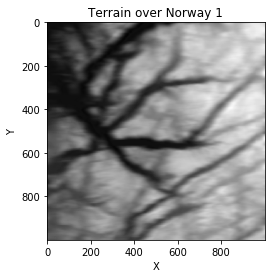

In [44]:


#plot_3d_graph(x_mesh, y_mesh, z, "Norway Terrain Data", "Elevation of terrain", dpi=150, formatter='%.f',z_line_ticks=6, view_azim=-50, set_limit=False, save_fig=True)
#plot_3d_graph(x_mesh, y_mesh, smoothed_z, "Norway Terrain Data Smoothed (Savgol filter)", "Elevation of terrain", dpi=100, formatter='%.f',z_line_ticks=6, view_azim=-50, set_limit=False, save_fig=True)
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(smoothed_z, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [35]:
from scipy.signal import savgol_filter
def create_terrain_data(N = 1000, path = 'DataFiles/SRTM_data_Norway_2.tif'):
    terrain = imread(path)
    terrain = terrain[:N,:N]
    # Creates mesh of image pixels
    x = np.linspace(0,1, np.shape(terrain)[0])
    y = np.linspace(0,1, np.shape(terrain)[1])
    x_mesh, y_mesh = np.meshgrid(x,y)

    predictors_input = np.c_[x_mesh.ravel(), y_mesh.ravel()]
    terrain = savgol_filter(terrain, 77, 2)
    z = terrain.ravel()

    return x_mesh, y_mesh, z

x, y, z= create_terrain_data()
print(x.shape, y.shape, z.shape, pred.shape)

(1000, 1000) (1000, 1000) (1000000,) (1000000, 2)


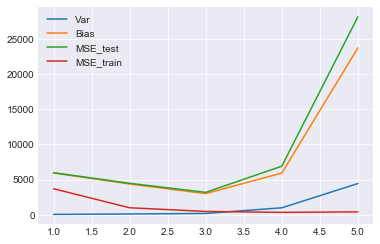

In [36]:
N = 100
p = 5
trials = 100
sample_count = N
polydegree = np.zeros(p); r2_boot = np.zeros(p); mse_boot = np.zeros(p); bias_boot = np.zeros(p); var_boot = np.zeros(p)

r2_boot_train = np.zeros(p); mse_boot_train = np.zeros(p); bias_boot_train = np.zeros(p); var_boot_train = np.zeros(p)
x, y, z = create_terrain_data(N = N, path = 'DataFiles/SRTM_data_Norway_2.tif')

for degree in range(p):
    polydegree[degree] = degree + 1

    X = create_X(x, y, degree, debug = False)
    boot = BootstrapSampling(trials, sample_count).train_and_test(X, z, RegressionType.OLS)
    
    r2_boot[degree] = boot.r2; mse_boot[degree] = boot.mse; bias_boot[degree] = boot.bias; var_boot[degree] = boot.var; 
    r2_boot_train[degree] = boot.r2_train; mse_boot_train[degree] = boot.mse_train; bias_boot_train[degree] = boot.bias_train; var_boot_train[degree] = boot.var_train;

values_to_plot = {
    "Var": var_boot,
    "Bias": bias_boot,
    "MSE_test": mse_boot,
    "MSE_train": mse_boot_train,
}

plot_test_train(polydegree, values_to_plot) 

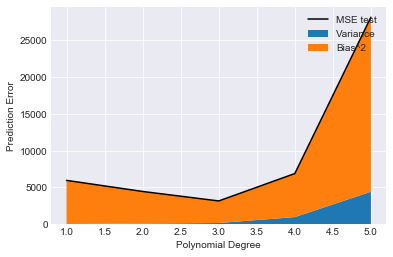

In [37]:
values_to_plot = {
    "variance": var_boot,
    "mse": mse_boot,
    "bias": bias_boot,
}

plot_bias_variance_analysis(polydegree, values_to_plot)

In [16]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
    print(column, num)

y1 1
y2 2
y3 3
y4 4
y5 5
y6 6
y7 7
y8 8
y9 9


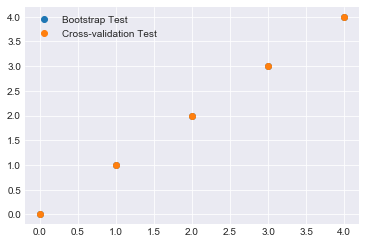

In [74]:

values_to_plot = {
    "Bootstrap Test": [x for x in range(5)],
    "Cross-validation Test": [x for x in range(5)],
    #"Bootstrap Train": mse_boot_train,
    #"Cross-validation Train": mse_kfold_train,
}

plt.style.use('seaborn-darkgrid')
for val in values_to_plot:
    plt.plot([x for x in range(5)], values_to_plot[val], 'o', label=val)

plt.legend()

plt.show()